# KP's Repair Algorithm - Parallel Analysis

#### CPU Specifications (Agraz's Laptop) 
| Feature     | Specification |
|-------------| ------------- |
| Model| Apple Silicon M1 |
| Physical Threads (Cores)| 8 |
| Logical Threads | 8 |
| Base Clock Speed | 2.06GHz |
| Max Clock Speed | 3.20GHz |
| Cache | 8MB L3 |
| RAM Size | 8GB |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display Pandas Dataframes Settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

PHYSICAL_THREADS = 8

In [2]:
md_serial_data = pd.read_csv("results/md_rpa_serial.csv").to_numpy()
lg_serial_data = pd.read_csv("results/lg_rpa_serial.csv").to_numpy()

md_spmd_data = pd.read_csv("results/md_rpa_spmd.csv").to_numpy()
lg_spmd_data = pd.read_csv("results/lg_rpa_spmd.csv").to_numpy()

md_spmd_nf_data = pd.read_csv("results/md_rpa_spmd_noflush.csv").to_numpy()
lg_spmd_nf_data = pd.read_csv("results/lg_rpa_spmd_noflush.csv").to_numpy()

md_static_data = pd.read_csv("results/md_rpa_static.csv").to_numpy()
lg_static_data = pd.read_csv("results/lg_rpa_static.csv").to_numpy()

md_dynamic_data = pd.read_csv("results/md_rpa_dynamic.csv").to_numpy()
lg_dynamic_data = pd.read_csv("results/lg_rpa_dynamic.csv").to_numpy()

md_guided_data = pd.read_csv("results/md_rpa_guided.csv").to_numpy()
lg_guided_data = pd.read_csv("results/lg_rpa_guided.csv").to_numpy()

md_auto_data = pd.read_csv("results/md_rpa_auto.csv").to_numpy()
lg_auto_data = pd.read_csv("results/lg_rpa_auto.csv").to_numpy()

md_lazyspmd_data = pd.read_csv("results/md_rpa_lazyspmd.csv").to_numpy()
lg_lazyspmd_data = pd.read_csv("results/lg_rpa_lazyspmd.csv").to_numpy()

threads_array = np.arange(start=1,stop=PHYSICAL_THREADS+1) # Returns numpy array from 1 (Inclusive) to 17 (Exclusive)

md_algorithm_data = pd.DataFrame(columns=
    ['ThreadQty', 
     'Code 1 (SPMD)',
     'Code 2 (No Flush)',
     'Code 3 (Static)',
     'Code 4 (Dynamic)',
     'Code 5 (Guided)',
     'Code 6 (Auto)',
     'Code 7 (LazySPMD)'
    ])

lg_algorithm_data = pd.DataFrame(columns=
    ['ThreadQty', 
     'Code 1 (SPMD)',
     'Code 2 (No Flush)',
     'Code 3 (Static)',
     'Code 4 (Dynamic)',
     'Code 5 (Guided)',
     'Code 6 (Auto)',
     'Code 7 (LazySPMD)'
    ])

columns = pd.MultiIndex.from_product([['Speedup', 'Efficiency', 'Parallelizability']], names=[''])
codes = ['SPMD', 'No Flush', 'Static', 'Dynamic', 'Guided', 'Auto', 'LazySPMD']
rows = pd.MultiIndex.from_tuples([(thread, code) for thread in threads_array for code in codes], names=['ThreadQty', ''])
md_algorithm_metrics = pd.DataFrame(index=rows, columns=columns)
lg_algorithm_metrics = pd.DataFrame(index=rows, columns=columns)

In [3]:
secuential_data = pd.DataFrame(columns=['Code 0 (Medium)', 'Code 0 (Large)'])
secuential_data.loc['1'] = [np.mean(md_serial_data), np.mean(lg_serial_data)]
print("\033[1mSecuential Algorithm Execution Time:\033[0m\n \tCHROMOSOMES: 6000\tGENES: 15")
secuential_data

Secuential Algorithm Execution Time:
 	CHROMOSOMES: 6000	GENES: 15


,Code 0 (Medium),Code 0 (Large)
1,192.741969,621.712001


In [4]:
# Medium Instance Data
for index in range(len(md_spmd_data)):
    md_algorithm_data.loc[f'{index+1}'] = [
        f'{threads_array[index]}', 
        md_spmd_data[index][0],
        md_spmd_nf_data[index][0], 
        md_static_data[index][0],
        md_dynamic_data[index][0],
        md_guided_data[index][0],
        md_auto_data[index][0],
        md_lazyspmd_data[index][0]
    ]

md_algorithm_data.set_index('ThreadQty', inplace=True)
print("\033[1mMedium Instance Results:\033[0m\n \tCHROMOSOMES: 6000\tGENES: 15\n \tTimes Executed per Thread: 1")
md_algorithm_data

Medium Instance Results:
 	CHROMOSOMES: 6000	GENES: 15
 	Times Executed per Thread: 1


,Code 1 (SPMD),Code 2 (No Flush),Code 3 (Static),Code 4 (Dynamic),Code 5 (Guided),Code 6 (Auto),Code 7 (LazySPMD)
ThreadQty,,,,,,,
1,192.741969,192.741969,192.741969,192.741969,192.741969,192.741969,192.741969
2,49.080863,50.419678,50.086802,49.662228,49.858710,49.931663,100.084645
3,22.685580,22.954223,23.156300,23.234489,22.732844,24.713627,73.854551
4,12.973739,14.134414,14.489438,14.991851,13.928304,15.720448,61.575130
5,10.812508,11.443378,12.171615,11.710969,11.452784,12.419880,62.161343
6,9.138421,9.708144,10.321208,9.769092,9.651872,10.237768,61.960046
7,8.203059,8.636376,9.125896,8.855033,8.709451,8.765068,63.660436
8,7.012189,7.196074,7.476098,7.276084,7.453582,7.372338,60.817592


In [5]:
# Large Instance Data
for index in range(len(lg_spmd_data)):
    lg_algorithm_data.loc[f'{index+1}'] = [
        f'{threads_array[index]}', 
        lg_spmd_data[index][0],
        lg_spmd_nf_data[index][0], 
        lg_static_data[index][0],
        lg_dynamic_data[index][0],
        lg_guided_data[index][0],
        lg_auto_data[index][0],
        lg_lazyspmd_data[index][0]
    ]

lg_algorithm_data.set_index('ThreadQty', inplace=True)
print("\033[1mLarge Instance Results:\033[0m\n \tCHROMOSOMES: 6000\tGENES: 30\n \tTimes Executed per Thread: 5")
lg_algorithm_data

Large Instance Results:
 	CHROMOSOMES: 6000	GENES: 30
 	Times Executed per Thread: 5


,Code 1 (SPMD),Code 2 (No Flush),Code 3 (Static),Code 4 (Dynamic),Code 5 (Guided),Code 6 (Auto),Code 7 (LazySPMD)
ThreadQty,,,,,,,
1,621.712001,621.712001,621.712001,621.712001,621.712001,621.712001,621.712001
2,159.408103,158.677102,159.426377,158.117579,160.344213,161.222888,332.056219
3,79.347300,80.562798,79.375944,79.069554,81.958034,81.713037,258.417326
4,51.565568,51.647250,49.850278,48.355796,50.570796,50.750212,207.323010
5,40.627479,39.393840,39.446364,38.755496,40.253135,40.404412,206.825214
6,32.524290,32.042350,31.699242,31.449402,31.765664,34.277495,208.623102
7,28.591953,28.055089,28.744936,27.842677,28.243570,29.543289,206.498714
8,23.504322,23.509819,23.415006,23.355923,23.472563,25.025758,205.142314


In [6]:
# Medium Instance Metrics
for index in range(len(threads_array)):
    for j in range(len(codes)):
        speedup = secuential_data.iat[0, 0] / np.round(md_algorithm_data.iat[index, j], 6)
        efficiency = np.round((speedup / md_algorithm_data.iat[index, j]) * 100, 2)
        parallelizability = np.round(md_algorithm_data.iat[0, j] / md_algorithm_data.iat[index, j],3)

        md_algorithm_metrics.at[(threads_array[index], codes[j]), ('Speedup')] = speedup
        md_algorithm_metrics.at[(threads_array[index], codes[j]), ('Efficiency')] = f'{efficiency}%'
        md_algorithm_metrics.at[(threads_array[index], codes[j]), ('Parallelizability')] = parallelizability
        
print("\033[1mAlgorithms Metrics\033[0m")
md_algorithm_metrics

Algorithms Metrics


Speedup Efficiency Parallelizability
ThreadQty                                                 
1         SPMD            1.0      0.52%               1.0
          No Flush        1.0      0.52%               1.0
          Static          1.0      0.52%               1.0
          Dynamic         1.0      0.52%               1.0
          Guided          1.0      0.52%               1.0
          Auto            1.0      0.52%               1.0
          LazySPMD        1.0      0.52%               1.0
2         SPMD       3.927029       8.0%             3.927
          No Flush   3.822753      7.58%             3.823
          Static     3.848159      7.68%             3.848
          Dynamic    3.881058      7.81%             3.881
          Guided     3.865763      7.75%             3.866
          Auto       3.860115      7.73%              3.86
          LazySPMD    1.92579      1.92%             1.926
3         SPMD       8.496233     37.45%             8.496
          No Flush   8.396798     36.58%             8.397
          Static     8.323522     35.94%             8.324
          Dynamic    8.295511      35.7%             8.296
          Guided     8.478568      37.3%             8.479
          Auto       7.799016     31.56%             7.799
          LazySPMD   2.609751      3.53%              2.61
4         SPMD      14.856316    114.51%            14.856
          No Flush  13.636361     96.48%            13.636
          Static    13.302239     91.81%            13.302
          Dynamic   12.856449     85.76%            12.856
          Guided    13.838151     99.35%            13.838
          Auto       12.26059     77.99%            12.261
          LazySPMD   3.130192      5.08%              3.13
5         SPMD      17.825834    164.86%            17.826
          No Flush  16.843101    147.19%            16.843
          Static    15.835365     130.1%            15.835
          Dynamic   16.458243    140.54%            16.458
          Guided    16.829268    146.94%            16.829
          Auto      15.518827    124.95%            15.519
          LazySPMD   3.100673      4.99%             3.101
6         SPMD      21.091386     230.8%            21.091
          No Flush  19.853637     204.5%            19.854
          Static    18.674361    180.93%            18.674
          Dynamic   19.729773    201.96%             19.73
          Guided    19.969387     206.9%            19.969
          Auto      18.826562    183.89%            18.827
          LazySPMD   3.110746      5.02%             3.111
7         SPMD      23.496353    286.43%            23.496
          No Flush  22.317459    258.41%            22.317
          Static    21.120334    231.43%             21.12
          Dynamic   21.766375    245.81%            21.766
          Guided    22.130209    254.09%             22.13
          Auto      21.989786    250.88%             21.99
          LazySPMD   3.027657      4.76%             3.028
8         SPMD      27.486705    391.98%            27.487
          No Flush  26.784323    372.21%            26.784
          Static    25.781092    344.85%            25.781
          Dynamic   26.489794    364.07%             26.49
          Guided    25.858972    346.93%            25.859
          Auto      26.143941    354.62%            26.144
          LazySPMD   3.169181      5.21%             3.169

In [7]:
# Large Instance Metrics
for index in range(len(threads_array)):
    for j in range(len(codes)):
        speedup = secuential_data.iat[0, 0] / np.round(lg_algorithm_data.iat[index, j], 6)
        efficiency = np.round((speedup / lg_algorithm_data.iat[index, j]) * 100, 2)
        parallelizability = np.round(lg_algorithm_data.iat[0, j] / lg_algorithm_data.iat[index, j],3)

        lg_algorithm_metrics.at[(threads_array[index], codes[j]), ('Speedup')] = speedup
        lg_algorithm_metrics.at[(threads_array[index], codes[j]), ('Efficiency')] = f'{efficiency}%'
        lg_algorithm_metrics.at[(threads_array[index], codes[j]), ('Parallelizability')] = parallelizability
        
print("\033[1mAlgorithms Metrics\033[0m")
lg_algorithm_metrics

Algorithms Metrics


Speedup Efficiency Parallelizability
ThreadQty                                                
1         SPMD      0.310018      0.05%               1.0
          No Flush  0.310018      0.05%               1.0
          Static    0.310018      0.05%               1.0
          Dynamic   0.310018      0.05%               1.0
          Guided    0.310018      0.05%               1.0
          Auto      0.310018      0.05%               1.0
          LazySPMD  0.310018      0.05%               1.0
2         SPMD       1.20911      0.76%               3.9
          No Flush   1.21468      0.77%             3.918
          Static    1.208972      0.76%               3.9
          Dynamic   1.218979      0.77%             3.932
          Guided    1.202051      0.75%             3.877
          Auto        1.1955      0.74%             3.856
          LazySPMD   0.58045      0.17%             1.872
3         SPMD      2.429093      3.06%             7.835
          No Flush  2.392444      2.97%             7.717
          Static    2.428216      3.06%             7.832
          Dynamic   2.437626      3.08%             7.863
          Guided    2.351715      2.87%             7.586
          Auto      2.358766      2.89%             7.608
          LazySPMD  0.745855      0.29%             2.406
4         SPMD      3.737804      7.25%            12.057
          No Flush  3.731892      7.23%            12.038
          Static    3.866417      7.76%            12.472
          Dynamic   3.985912      8.24%            12.857
          Guided     3.81133      7.54%            12.294
          Auto      3.797855      7.48%             12.25
          LazySPMD   0.92967      0.45%             2.999
5         SPMD      4.744128     11.68%            15.303
          No Flush  4.892693     12.42%            15.782
          Static    4.886178     12.39%            15.761
          Dynamic   4.973281     12.83%            16.042
          Guided    4.788247      11.9%            15.445
          Auto       4.77032     11.81%            15.387
          LazySPMD  0.931908      0.45%             3.006
6         SPMD      5.926093     18.22%            19.115
          No Flush  6.015226     18.77%            19.403
          Static    6.080334     19.18%            19.613
          Dynamic   6.128637     19.49%            19.769
          Guided     6.06762      19.1%            19.572
          Auto      5.622989      16.4%            18.138
          LazySPMD  0.923876      0.44%              2.98
7         SPMD      6.741126     23.58%            21.744
          No Flush  6.870125     24.49%             22.16
          Static     6.70525     23.33%            21.629
          Dynamic   6.922537     24.86%            22.329
          Guided    6.824278     24.16%            22.013
          Auto      6.524053     22.08%            21.044
          LazySPMD  0.933381      0.45%             3.011
8         SPMD      8.200278     34.89%            26.451
          No Flush   8.19836     34.87%            26.445
          Static    8.231558     35.16%            26.552
          Dynamic   8.252381     35.33%            26.619
          Guided    8.211373     34.98%            26.487
          Auto      7.701743     30.78%            24.843
          LazySPMD  0.939552      0.46%             3.031

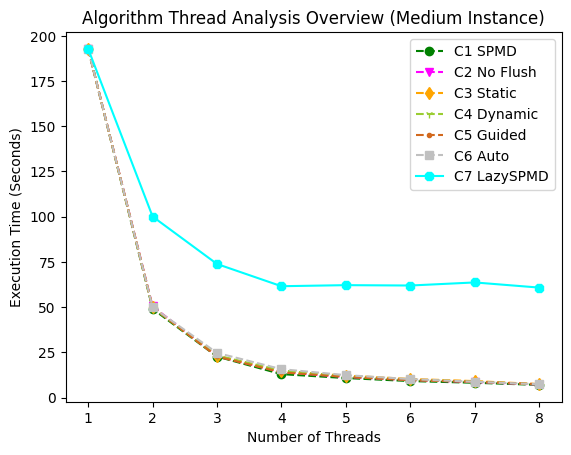

In [8]:
plt.title("Algorithm Thread Analysis Overview (Medium Instance)")
plt.xlabel("Number of Threads")
plt.ylabel("Execution Time (Seconds)")
plt.plot(threads_array, md_algorithm_data.get('Code 1 (SPMD)'), 'o--', label="C1 SPMD", color='green')
plt.plot(threads_array, md_algorithm_data.get('Code 2 (No Flush)'), 'v--', label="C2 No Flush", color='magenta')
plt.plot(threads_array, md_algorithm_data.get('Code 3 (Static)'), 'd--', label="C3 Static", color='orange')
plt.plot(threads_array, md_algorithm_data.get('Code 4 (Dynamic)'), '1--', label="C4 Dynamic", color='yellowgreen')
plt.plot(threads_array, md_algorithm_data.get('Code 5 (Guided)'), '.--', label="C5 Guided", color='chocolate')
plt.plot(threads_array, md_algorithm_data.get('Code 6 (Auto)'), 's--', label="C6 Auto", color='silver')
plt.plot(threads_array, md_algorithm_data.get('Code 7 (LazySPMD)'), '8-', label="C7 LazySPMD", color='cyan')
plt.legend(loc="upper right")
plt.xticks(threads_array)
plt.show()

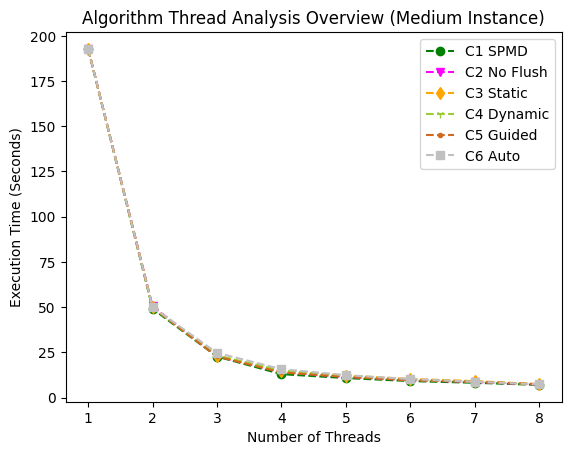

In [9]:
plt.title("Algorithm Thread Analysis Overview (Medium Instance)")
plt.xlabel("Number of Threads")
plt.ylabel("Execution Time (Seconds)")
plt.plot(threads_array, md_algorithm_data.get('Code 1 (SPMD)'), 'o--', label="C1 SPMD", color='green')
plt.plot(threads_array, md_algorithm_data.get('Code 2 (No Flush)'), 'v--', label="C2 No Flush", color='magenta')
plt.plot(threads_array, md_algorithm_data.get('Code 3 (Static)'), 'd--', label="C3 Static", color='orange')
plt.plot(threads_array, md_algorithm_data.get('Code 4 (Dynamic)'), '1--', label="C4 Dynamic", color='yellowgreen')
plt.plot(threads_array, md_algorithm_data.get('Code 5 (Guided)'), '.--', label="C5 Guided", color='chocolate')
plt.plot(threads_array, md_algorithm_data.get('Code 6 (Auto)'), 's--', label="C6 Auto", color='silver')
plt.legend(loc="upper right")
plt.xticks(threads_array)
plt.show()

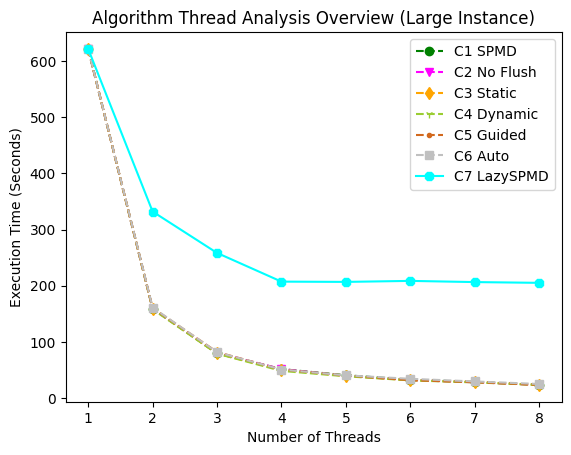

In [10]:
plt.title("Algorithm Thread Analysis Overview (Large Instance)")
plt.title("Algorithm Thread Analysis Overview (Large Instance)")
plt.xlabel("Number of Threads")
plt.ylabel("Execution Time (Seconds)")
plt.plot(threads_array, lg_algorithm_data.get('Code 1 (SPMD)'), 'o--', label="C1 SPMD", color='green')
plt.plot(threads_array, lg_algorithm_data.get('Code 2 (No Flush)'), 'v--', label="C2 No Flush", color='magenta')
plt.plot(threads_array, lg_algorithm_data.get('Code 3 (Static)'), 'd--', label="C3 Static", color='orange')
plt.plot(threads_array, lg_algorithm_data.get('Code 4 (Dynamic)'), '1--', label="C4 Dynamic", color='yellowgreen')
plt.plot(threads_array, lg_algorithm_data.get('Code 5 (Guided)'), '.--', label="C5 Guided", color='chocolate')
plt.plot(threads_array, lg_algorithm_data.get('Code 6 (Auto)'), 's--', label="C6 Auto", color='silver')
plt.plot(threads_array, lg_algorithm_data.get('Code 7 (LazySPMD)'), '8-', label="C7 LazySPMD", color='cyan')
plt.legend(loc="upper right")
plt.xticks(threads_array)
plt.show()

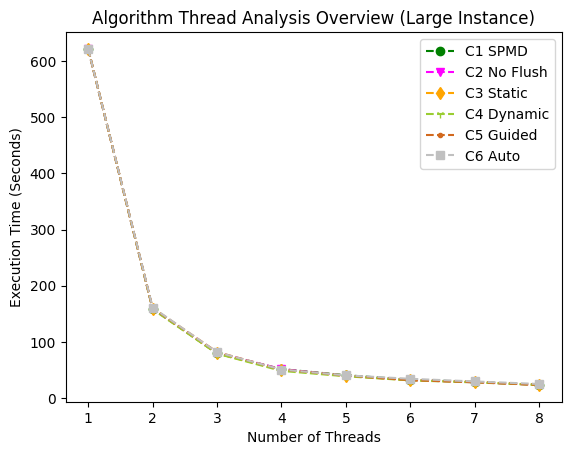

In [11]:
plt.title("Algorithm Thread Analysis Overview (Large Instance)")
plt.title("Algorithm Thread Analysis Overview (Large Instance)")
plt.xlabel("Number of Threads")
plt.ylabel("Execution Time (Seconds)")
plt.plot(threads_array, lg_algorithm_data.get('Code 1 (SPMD)'), 'o--', label="C1 SPMD", color='green')
plt.plot(threads_array, lg_algorithm_data.get('Code 2 (No Flush)'), 'v--', label="C2 No Flush", color='magenta')
plt.plot(threads_array, lg_algorithm_data.get('Code 3 (Static)'), 'd--', label="C3 Static", color='orange')
plt.plot(threads_array, lg_algorithm_data.get('Code 4 (Dynamic)'), '1--', label="C4 Dynamic", color='yellowgreen')
plt.plot(threads_array, lg_algorithm_data.get('Code 5 (Guided)'), '.--', label="C5 Guided", color='chocolate')
plt.plot(threads_array, lg_algorithm_data.get('Code 6 (Auto)'), 's--', label="C6 Auto", color='silver')
plt.legend(loc="upper right")
plt.xticks(threads_array)
plt.show()